In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib as plt
from imblearn.over_sampling import SMOTE
import seaborn as sns
%matplotlib inline

In [3]:
dataset = pd.read_csv('../data/clean_ftkp.csv',nrows=2000)
y = dataset['Kelas Status Pulang Peserta Encoded']
param_by_feature_wiz = dataset[['Jenis Kunjungan FKTP label', 'Tingkat Pelayanan', 'Jenis Kunjungan FKTP', 'Jenis Poli FKTP']]
all_feature = dataset[['Bobot','Provinsi FKTP','Kepemilikan FKTP','Jenis FKTP','Tipe FKTP','Tingkat Pelayanan FKTP','Jenis Poli FKTP','Segmen Peserta saat akses layanan FKTP','Kode dan nama diagnosis ICD 10 (3 digit)','Provinsi faskes tujuan rujukan','Kepemilikan faskes tujuan rujukan','Jenis faskes tujuan rujukan','Tipe faskes tujuan rujukan','Poli faskes tujuan rujukan','Jenis Kunjungan FKTP','Provinsi','Kepemilikan','Jenis','Tipe','Tingkat Pelayanan','Jenis Poli','Segemen Akses','Provinsi faskes tujuan rujukan label','Kepemilikan faskes tujuan rujukan label','Jenis faskes tujuan rujukan label','Tipe faskes tujuan rujukan label','Poli faskes tujuan rujukan label','Jenis Kunjungan FKTP label']]
feature_from_rfe = dataset[['Kepemilikan FKTP', 'Jenis FKTP', 'Tipe FKTP', 'Tingkat Pelayanan FKTP',
       'Jenis Poli FKTP', 'Kode dan nama diagnosis ICD 10 (3 digit)',
       'Kepemilikan faskes tujuan rujukan', 'Jenis faskes tujuan rujukan',
       'Poli faskes tujuan rujukan', 'Jenis Kunjungan FKTP',
       'Provinsi faskes tujuan rujukan label',
       'Tipe faskes tujuan rujukan label', 'Poli faskes tujuan rujukan label',
       'Jenis Kunjungan FKTP label']]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(feature_from_rfe, y, test_size=0.3, random_state=42)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
y_res.value_counts()

0    933
1    933
Name: Kelas Status Pulang Peserta Encoded, dtype: int64

In [20]:
def visualize_model_performance(yhat, y_test):
    cf_matrix = confusion_matrix(y_test, yhat)
    accuracy = accuracy_score(y_test, yhat)
    f1_score_result = f1_score(y_test, yhat)
    precision_result = precision_score(y_test, yhat)
    recall_result = recall_score(y_test, yhat)
    group_names = ["True Neg","False Pos","False Neg","True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
    print("""
    Accuracy: {}%
    F1 Score: {}%
    Precision: {}%
    Recall: {}%
    """.format(accuracy * 100, f1_score_result * 100, precision_result * 100, recall_result * 100))
    print(y_test.value_counts())

## Gaussian Naive Bayes


    Accuracy: 99.5%
    F1 Score: 99.25187032418954%
    Precision: 99.5%
    Recall: 99.00497512437812%
    
0    399
1    201
Name: Kelas Status Pulang Peserta Encoded, dtype: int64


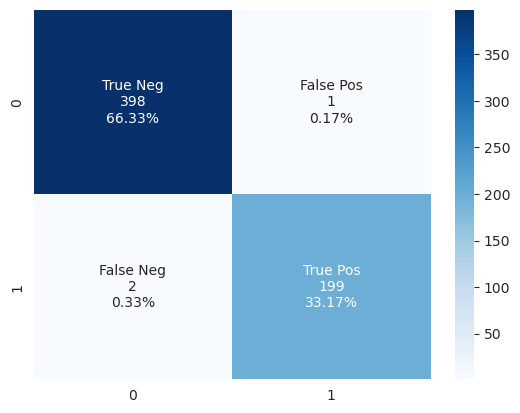

In [21]:
naive_bayes_model = BaggingClassifier(GaussianNB(),  max_samples=0.5)
naive_bayes_model.fit(X_res,y_res)

yhat = naive_bayes_model.predict(X_test)
visualize_model_performance(yhat, y_test)

## Random Forest Classifier


    Accuracy: 99.66666666666667%
    F1 Score: 99.5%
    


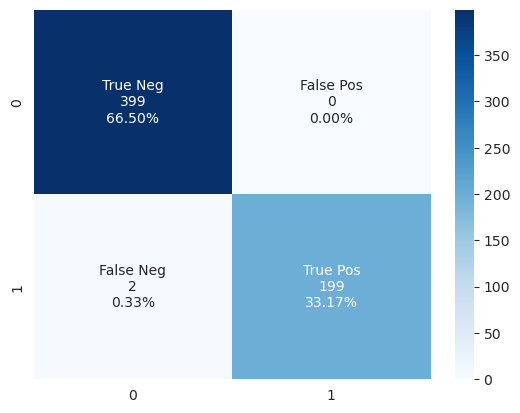

In [9]:
random_forest_mode = RandomForestClassifier(max_depth=2, random_state=0)
random_forest_mode.fit(X_res,y_res)

yhat = random_forest_mode.predict(X_test)
visualize_model_performance(yhat, y_test)

## Logistic Regression

/home/huntz/anaconda3/envs/satria_data_2022/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/huntz/anaconda3/envs/satria_data_2022/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab


    Accuracy: 99.0%
    F1 Score: 98.52216748768473%
    


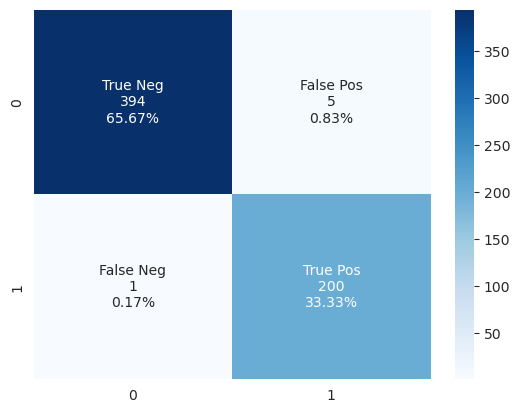

In [10]:
logistic_regression_model = BaggingClassifier(LogisticRegression(),  max_samples=0.5)
logistic_regression_model.fit(X_res,y_res)

yhat = logistic_regression_model.predict(X_test)
visualize_model_performance(yhat, y_test)